# Clase 06 - Raíces de ecuaciones complejas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from sympy import Symbol, exp, I, pi, N, expand

In [2]:
plt.style.use('seaborn-poster')

### Raíces de un polinomio

Calculemos las raíces del polinomio $x^4-5x^3-9x^2+155x-250$

In [3]:
p = [1,-5,-9,155,-250]
np.roots(p)

array([-5.+0.j,  4.+3.j,  4.-3.j,  2.+0.j])

### Fractales de Newton

Las raíces de la ecuación $z^4=1$ están dadas por $z=e^{2m\pi i/4}$ con $m=0,1,2,3$. O sea $z=1,i,-1,-i$.

In [4]:
expand(exp(pi*I/2), complex=True)

I

In [5]:
expand(exp(pi*I), complex=True)

-1

In [6]:
expand(exp(3*pi*I/2), complex=True)

-I

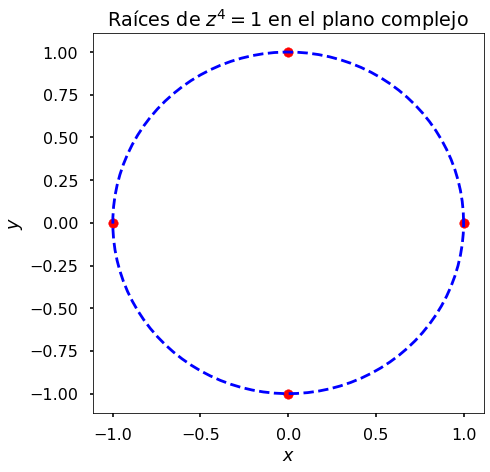

In [7]:
plt.figure(figsize=(7,7))
roots = np.array([[1,0], [0,1], [-1, 0], [0, -1]])
plt.scatter(roots[:,0], roots[:,1], s=90, c='red')
xp = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(xp), np.sin(xp), c='blue',ls='--');
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Raíces de $z^4=1$ en el plano complejo');

In [8]:
def newton(z, f, fprime, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        zn = z - f(z)/fprime(z)
        if abs(zn - z) < tol:
            return (i, zn)
        z = zn
    return (i, None)

Genera un arreglo con el número de iteraciones para converger a alguna de las raíces

In [9]:
def plot_newton_iters(p, pprime, n=400, extent=[-1,1,-1,1], cmap='hsv'):
    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            m[r, s] = newton(z, p, pprime)[0] 
    plt.imshow(m.T, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.xlabel('$x$')
    plt.ylabel('$y$');

Genera un arreglo con un índice de la raíz a la cual se converge

In [10]:
def plot_newton_basins(p, pprime, n=400, extent=[-1,1,-1,1], cmap='jet'):
    root_count = 0
    roots = {}

    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            raiz = newton(z, p, pprime)[1]
            if raiz != None:
                root = np.round(newton(z, p, pprime)[1],1)
                if not root in roots:
                    roots[root] = root_count
                    root_count += 1
                m[r, s] = roots[root]
    plt.imshow(m.T, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.xlabel('$x$')
    plt.ylabel('$y$');

Definición de la función y su derivada

In [11]:
f = lambda x: x**4 - 1
fprime = lambda x: 4*x**3

### Convergencia para las raíces de $z^4=1$

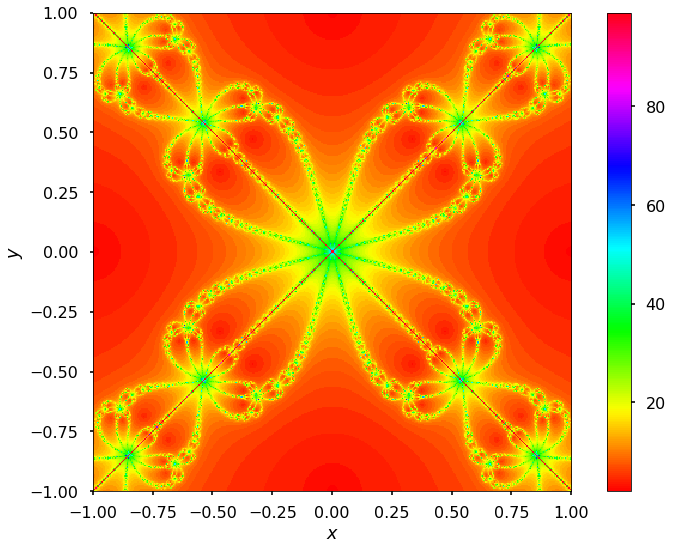

In [12]:
plot_newton_iters(f, fprime)

### Newton basins para $z^4=1$

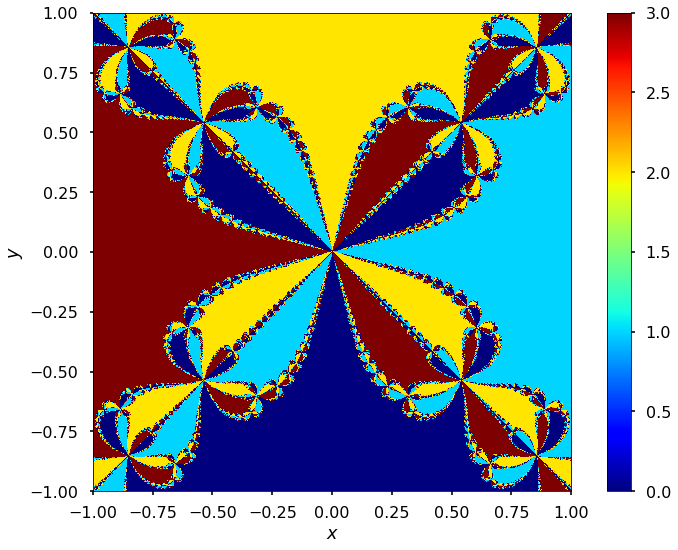

In [13]:
plot_newton_basins(f, fprime, n=500)